- Split the data up into a training, **validation**, and test set (we'll see why we need a validation set)
- Scale the variables (by standardizing or normalizing them) and seeing why we need to do this
- Make our multiple & polynomial regression models 
- Learn what **regularization** is and how it can help
- Understand **ridge** and **lasso** regression
- Get an introduction to **cross-validation** (CV) using RidgeCV and LassoCV

In [4]:
# Data and Stats packages
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## House Prices Data From Kaggle

For our dataset, we'll be using the house price dataset from [King County, WA](https://en.wikipedia.org/wiki/King_County,_Washington). The dataset is from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). 

The task is to build a regression model to **predict the price**, based on different attributes.

In [6]:
# Load the dataset 
house_df = pd.read_csv('/Users/dongwenou/Downloads/Intro to DS/kc_house_data.csv')
house_df.shape

(21613, 21)

In [8]:
# Load the dataset 
#house_df = pd.read_csv('../data/kc_house_data.csv')

house_df = house_df.sample(frac=1.0, random_state=42)[0:4000]
print(house_df.shape)
print(house_df.dtypes)
house_df.head()

(4000, 21)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


Now let's check for null values and look at the datatypes within the dataset.

In [141]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 735 to 3455
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4000 non-null   int64  
 1   date           4000 non-null   object 
 2   price          4000 non-null   float64
 3   bedrooms       4000 non-null   int64  
 4   bathrooms      4000 non-null   float64
 5   sqft_living    4000 non-null   int64  
 6   sqft_lot       4000 non-null   int64  
 7   floors         4000 non-null   float64
 8   waterfront     4000 non-null   int64  
 9   view           4000 non-null   int64  
 10  condition      4000 non-null   int64  
 11  grade          4000 non-null   int64  
 12  sqft_above     4000 non-null   int64  
 13  sqft_basement  4000 non-null   int64  
 14  yr_built       4000 non-null   int64  
 15  yr_renovated   4000 non-null   int64  
 16  zipcode        4000 non-null   int64  
 17  lat            4000 non-null   float64
 18  long  

In [142]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,4.586542e+09,2.876700e+09,1.000102e+06,2.126074e+09,3.889350e+09,7.334526e+09,9.842300e+09
price,4000.0,5.497522e+05,3.890505e+05,8.250000e+04,3.249500e+05,4.550000e+05,6.541250e+05,5.570000e+06
bedrooms,4000.0,3.379250e+00,9.225683e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,4000.0,2.116563e+00,7.831752e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,4000.0,2.096645e+03,9.577851e+02,3.840000e+02,1.420000e+03,1.920000e+03,2.570000e+03,1.354000e+04
sqft_lot,4000.0,1.616511e+04,5.120888e+04,5.720000e+02,5.200000e+03,7.675000e+03,1.087125e+04,1.651359e+06
floors,4000.0,1.475000e+00,5.302785e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,4000.0,7.750000e-03,8.770325e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,4000.0,2.325000e-01,7.681740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,4000.0,3.420750e+00,6.463930e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Below, let's choose a subset of columns. **NOTE**: The way I'm selecting columns here is not principled and is just for convenience. 

1. `bedrooms`
2. `bathrooms`
3. `sqft_living`
4. `sqft_lot`
5. `floors`
6. `sqft_above`
7. `sqft_basement`
8. `lat`
9. `long`
10. **`price`**: Our response variable

In [10]:
cols_of_interest = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                    'lat', 'long', 'price']
house_df = house_df[cols_of_interest]

# Convert house price to 1000s of dollars
house_df['price'] = house_df['price']/1000

Let's see how the response variable (`price`) is distributed

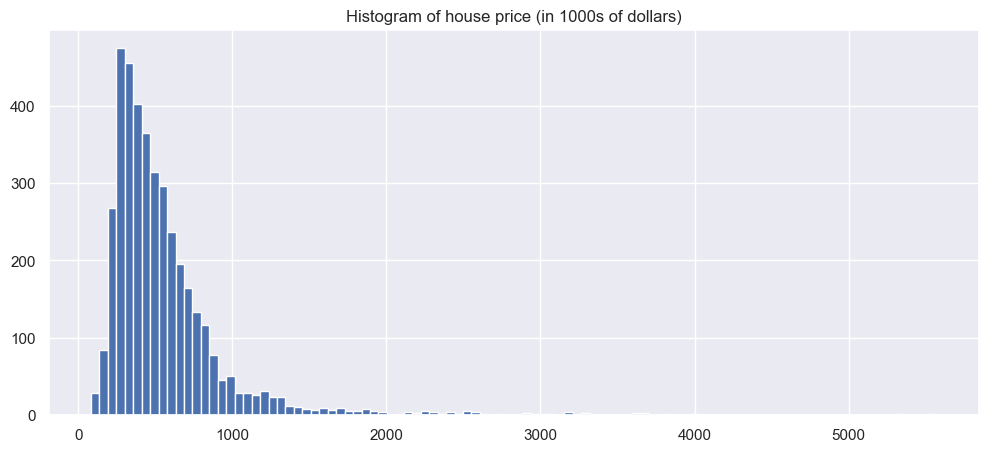

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(house_df['price'], bins=100)
ax.set_title('Histogram of house price (in 1000s of dollars)');

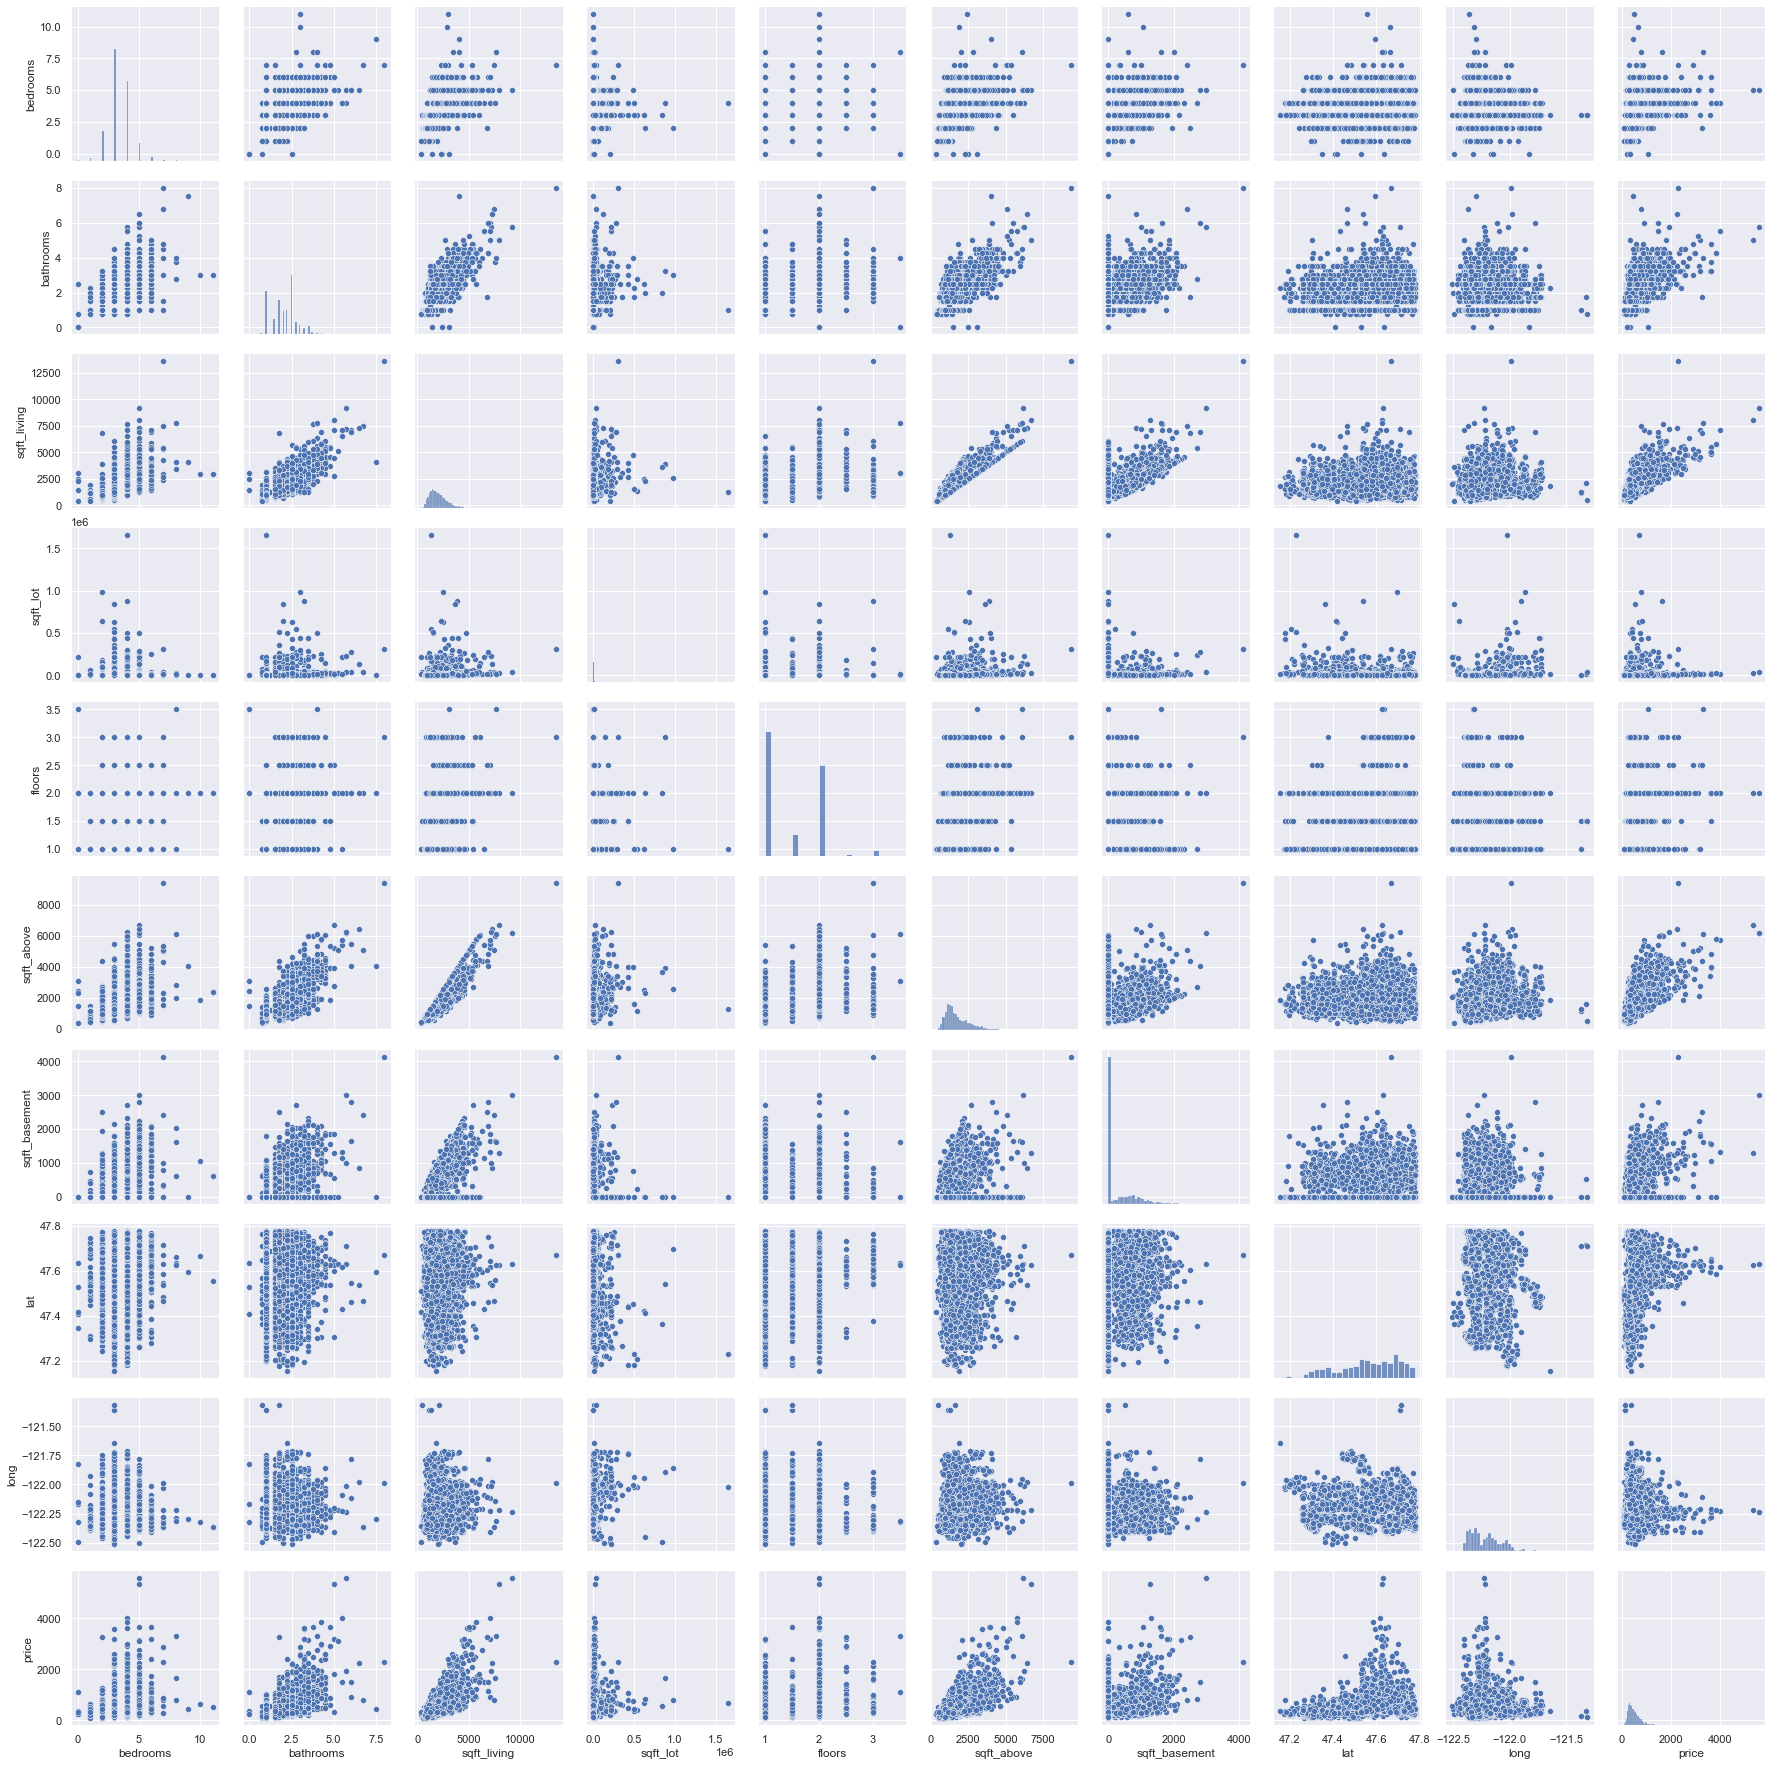

In [77]:
# This takes a bit of time but is worth it!!
sns.pairplot(house_df);

## Train-Validation-Test Split

The general idea: 

1. **Training Set**: Data you have seen. You train different types of models with various different hyper-parameters and regularization parameters on this data. 


2. **Validation Set**: Used to compare different models. We use this step to tune our hyper-parameters i.e. find the optimal set of hyper-parameters (such as the number of degrees of our polynomial for linear regression). Pick your best model here. 



3. **Test Set**: Using the best model from the previous step, simply report the score e.g. $R^2$ score, MSE or any metric that you care about, of that model on your test set. **DON'T TUNE YOUR PARAMETERS HERE!**. Why?
 Because we want to know how our model might do on data it hasn't seen before. We don't have access to this data (because it may not exist yet) but the test set, which we haven't seen or touched so far, is a good way to mimic this new data. 

Let's do 64% train, 16% validation, 20% test for this dataset.

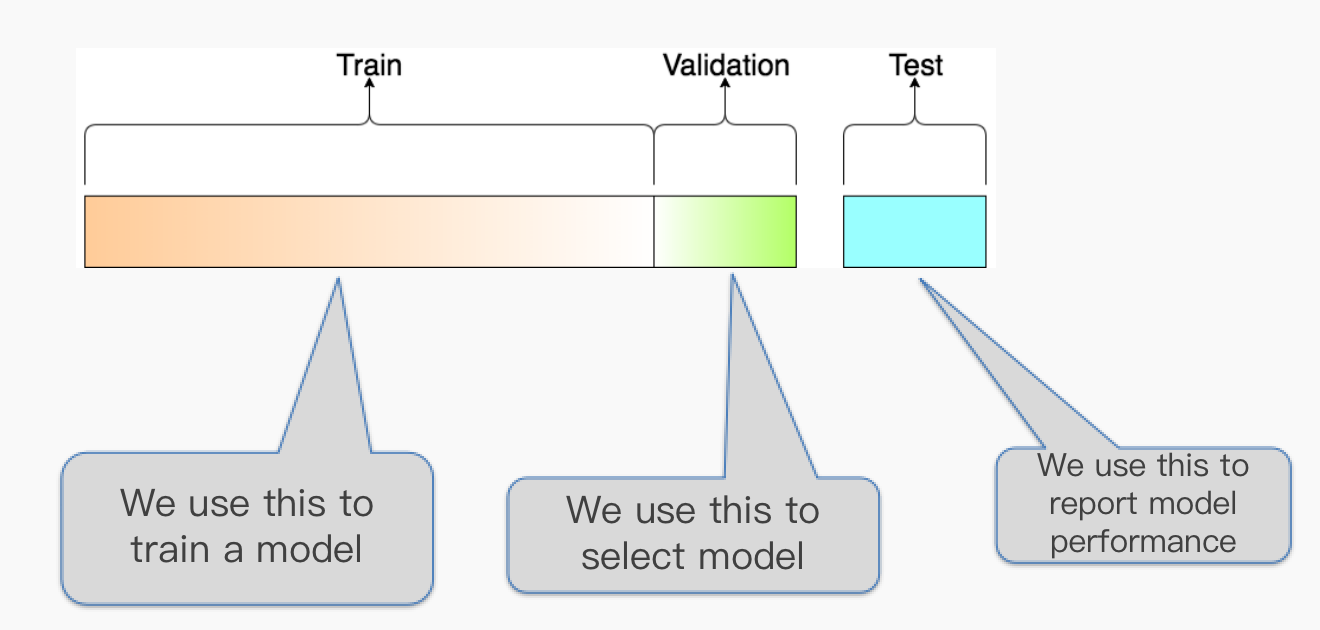

In [14]:
from sklearn.model_selection import train_test_split
#first split the data into a train-test split and don't touch the test set yet
train_df, test_df = train_test_split(house_df, test_size=0.2, random_state=10)
train_df.shape[0]/test_df.shape[0]

4.0

In [16]:
from sklearn.model_selection import train_test_split
#first split the data into a train-test split and don't touch the test set yet
train_df, test_df = train_test_split(house_df, test_size=0.2, random_state=10)

# next, split the training set into a train-validation split
# the test-size is 0.25 since we are splitting 80% of the data into 20% and 60% overall
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=100)

print('Train Set: {0:0.2f}%'.format(100*train_df.size/house_df.size))
print('Validation Set: {0:0.2f}%'.format(100*val_df.size/house_df.size))
print('Test Set: {0:0.2f}%'.format(100*test_df.size/house_df.size))

Train Set: 64.00%
Validation Set: 16.00%
Test Set: 20.00%


In [80]:
house_df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,price
735,4,2.25,2070,8893,2.0,2070,0,47.4388,-122.162,365.0
2830,5,3.00,2900,6730,1.0,1830,1070,47.6784,-122.285,865.0
4106,4,2.50,3770,10893,2.0,3770,0,47.5646,-122.129,1038.0
16218,3,3.50,4560,14608,2.0,4560,0,47.6995,-122.228,1490.0
19964,3,2.50,2550,5376,2.0,2550,0,47.6647,-122.083,711.0


In [81]:
train_df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,price
16423,4,2.50,3220,5120,2.0,2420,800,47.5434,-122.270,558.0
10914,2,1.00,1150,4400,1.0,1150,0,47.6226,-122.292,463.0
11658,3,2.00,1990,7405,1.0,1990,0,47.5421,-122.172,510.0
15294,4,1.75,1770,12875,1.0,1770,0,47.7438,-122.247,400.0
9409,4,3.50,2650,3060,2.0,2060,590,47.6735,-122.332,1008.0


# Modeling

In the last few sections, we studied linear model:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_M x_M + \epsilon
$$

Let's adopt a similar process here and get a few different models.

## Creating a Design Matrix

From our model setup in the equation in the previous section, we obtain the following: 

$$
Y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}, \quad X = \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n} \\
\end{bmatrix} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \dots & x_{1,M} \\
x_{2,1} & x_{2,2} & \dots & x_{2,M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \dots & x_{n,M} \\
\end{bmatrix}, \quad \beta = \begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_M
\end{bmatrix}, \quad \epsilon = \begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{bmatrix},
$$

$X$ is an n$\times$M matrix: this is our **design matrix** (and ${x_1}$ is a vector consisting of the values of the predictors for the first data point), $\beta$ is an M-dimensional vector (an M$\times$1 matrix), and $Y$ is an n-dimensional vector (an n$\times$1 matrix). In addition, we know that $\epsilon$ is an n-dimensional vector (an n$\times$1 matrix).

We have $M$ predictors and $n$ data points.

In [18]:
X = train_df[cols_of_interest]
y = train_df['price']
print(X.shape)
print(y.shape)

(2560, 10)
(2560,)


## Scaling our Design Matrix

### Standard Scaler (Standardization)
 
[Here's](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) the scikit-learn implementation of the standard scaler. 

$$
z = \frac{x-\mu}{\sigma}
$$

In the above setup: 

- $z$ is the standardized variable
- $x$ is the variable before standardization
- $\mu$ is the mean of the variable before standardization
- $\sigma$ is the standard deviation of the variable before standardization

Let's see an example of how this works:

,x,z_manual,z_sklearn
count,4000.000000,4.000000e+03,4.000000e+03
mean,2096.645250,-3.375078e-17,-3.197442e-17
std,957.785141,1.000000e+00,1.000125e+00
min,384.000000,-1.788131e+00,-1.788355e+00
25%,1420.000000,-7.064687e-01,-7.065571e-01
50%,1920.000000,-1.844310e-01,-1.844540e-01
75%,2570.000000,4.942181e-01,4.942799e-01
max,13540.000000,1.194773e+01,1.194922e+01


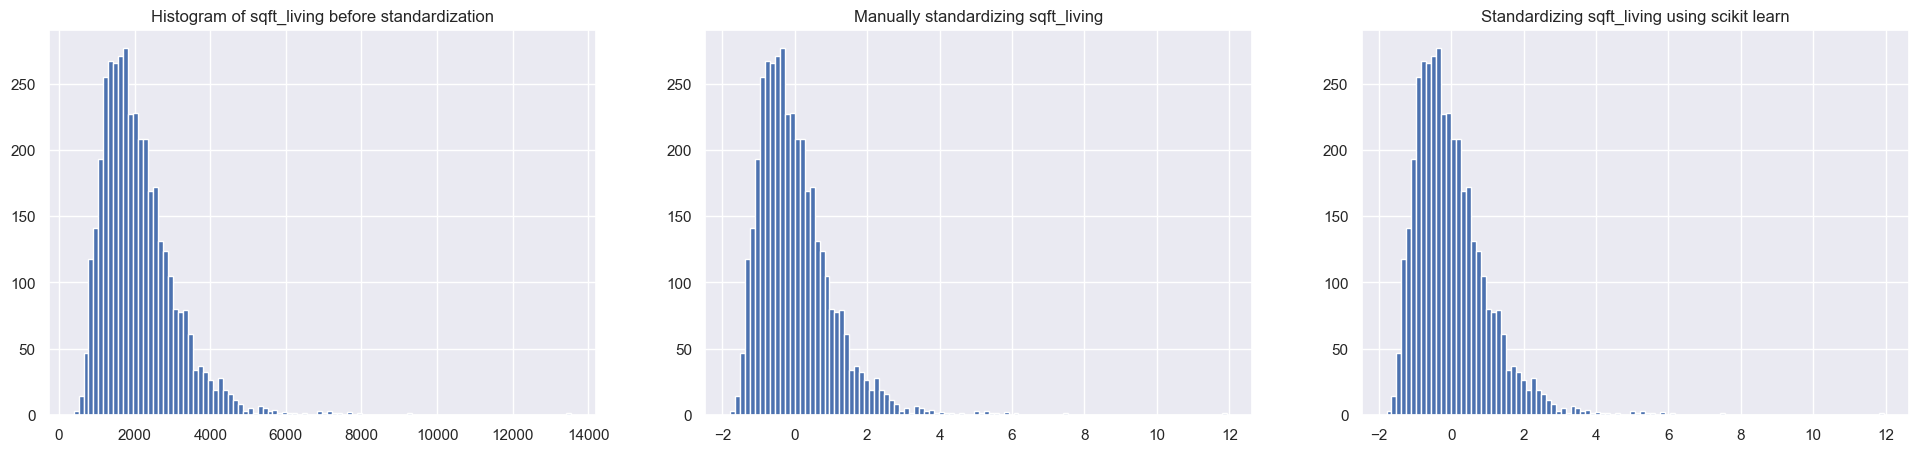

In [30]:
from sklearn.preprocessing import StandardScaler

x = house_df['sqft_living']
mu = x.mean()
sigma = x.std()
z = (x-mu)/sigma

# reshaping x to be a n by 1 matrix since that's how scikit learn likes data for standardization
x_reshaped = np.array(x).reshape(-1,1)
z_sklearn = StandardScaler().fit_transform(x_reshaped)

# Plotting the histogram of the variable before standardization
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax = ax.ravel()

ax[0].hist(x, bins=100)
ax[0].set_title('Histogram of sqft_living before standardization')

ax[1].hist(z, bins=100)
ax[1].set_title('Manually standardizing sqft_living')

ax[2].hist(z_sklearn, bins=100)
ax[2].set_title('Standardizing sqft_living using scikit learn');

# making things a dataframe to check if they work
pd.DataFrame({'x': x, 'z_manual': z, 'z_sklearn': z_sklearn.flatten()}).describe()

### Min-Max Scaler (Normalization)

[Here's](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) the scikit-learn implementation of the standard scaler. What is it doing though? 

$$
x_{new} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In the above setup: 

- $x_{new}$ is the normalized variable
- $x$ is the variable before normalized
- $x_{max}$ is the max value of the variable before normalization
- $x_{min}$ is the min value of the variable before normalization

Let's see an example of how this works:

,x,x_new_manual,x_new_sklearn
count,4000.000000,4000.000000,4000.000000
mean,2096.645250,0.130180,0.130180
std,957.785141,0.072802,0.072802
min,384.000000,0.000000,0.000000
25%,1420.000000,0.078747,0.078747
50%,1920.000000,0.116753,0.116753
75%,2570.000000,0.166160,0.166160
max,13540.000000,1.000000,1.000000


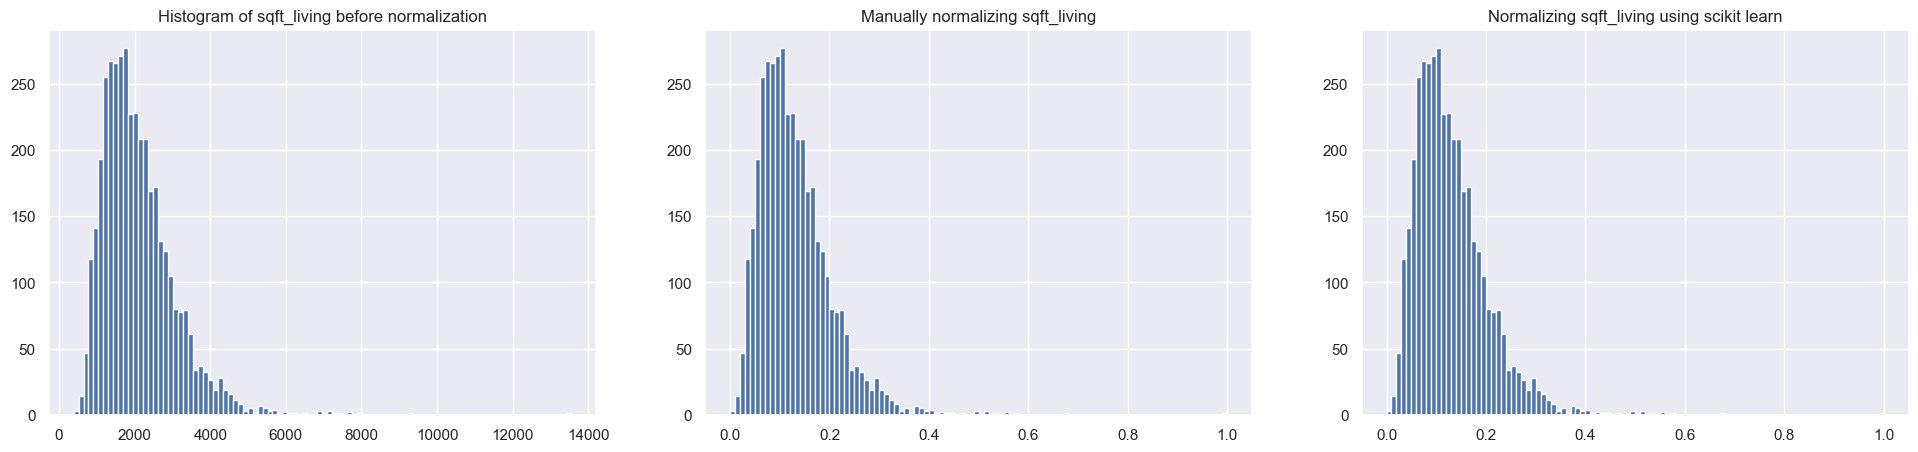

In [26]:
from sklearn.preprocessing import MinMaxScaler

x = house_df['sqft_living']
x_new = (x-x.min())/(x.max()-x.min())

# reshaping x to be a n by 1 matrix since that's how scikit learn likes data for normalization
x_reshaped = np.array(x).reshape(-1,1)
x_new_sklearn = MinMaxScaler().fit_transform(x_reshaped)

# Plotting the histogram of the variable before normalization
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax = ax.ravel()

ax[0].hist(x, bins=100)
ax[0].set_title('Histogram of sqft_living before normalization')

ax[1].hist(x_new, bins=100)
ax[1].set_title('Manually normalizing sqft_living')

ax[2].hist(x_new_sklearn, bins=100)
ax[2].set_title('Normalizing sqft_living using scikit learn');

# making things a dataframe to check if they work
pd.DataFrame({'x': x, 'x_new_manual': x_new, 'x_new_sklearn': x_new_sklearn.flatten()}).describe()

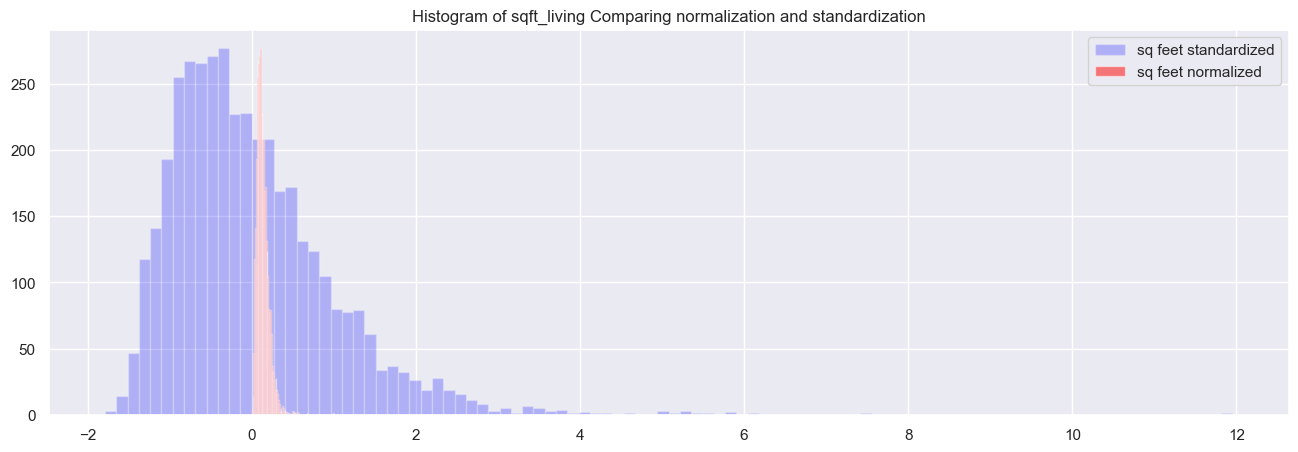

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
ax.hist((x - np.mean(x))/np.std(x), bins=100, alpha = 0.25, label = "sq feet standardized", color = "blue")
ax.hist(x_new, bins=100, label = "sq feet normalized", color = "red", alpha = .5)

ax.set_title('Histogram of sqft_living Comparing normalization and standardization')
plt.legend()

Should I standardize or normalize my data? [This](https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff) and [this](https://stackoverflow.com/questions/32108179/linear-regression-normalization-vs-standardization) are useful resources that I highly recommend. But in a nutshell, what they say is the following: 

**Pros of Normalization**

1. Normalization (which makes your data go from 0-1) is widely used in image processing and computer vision, where pixel intensities are non-negative and are typically scaled from a 0-255 scale to a 0-1 range for a lot of different algorithms. 
2. Normalization is also very useful in neural networks (which we will see later in the course) as it leads to the algorithms converging faster. 

**Pros of Standardization**

1. Standardization maintains outliers (do you see why?) whereas normalization makes outliers less obvious. In applications where outliers are useful, standardization should be done.
2. Standardization is useful when you assume your data comes from a Gaussian distribution (or something that is approximately Gaussian). 

**Some General Advice**

1. We use the data to calculate the parameters for standardization ($\mu$ and $\sigma$) and for normalization ($x_{min}$ and $x_{max}$). Make sure these parameters are learned on the training set, i.e., use the training set parameters even when normalizing/standardizing the test set. In sklearn terms, fit your scaler on the training set and use the scaler to transform your test set and validation set (**don't re-fit your scaler on test set data!**).
2. The point of standardization and normalization is to make your variables take on a more manageable scale. You should ideally standardize or normalize all your variables at the same time. 
3. Standardization and normalization is not always needed.


### Standardizing our Design Matrix

In [32]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
            'lat', 'long']

X_train = train_df[features]
y_train = np.array(train_df['price']).reshape(-1,1) #n-by-1 numpy array

X_val = val_df[features]
y_val = np.array(val_df['price']).reshape(-1,1)

X_test = test_df[features]
y_test = np.array(test_df['price']).reshape(-1,1)

scaler = StandardScaler().fit(X_train)

# This converts our matrices into numpy matrices
X_train_t = scaler.transform(X_train)
X_val_t = scaler.transform(X_val)
X_test_t = scaler.transform(X_test)

# Making the numpy matrices pandas dataframes
X_train_df = pd.DataFrame(X_train_t, columns=features)
X_val_df = pd.DataFrame(X_val_t, columns=features)
X_test_df = pd.DataFrame(X_test_t, columns=features)

display(X_train_df.describe().T)
display(X_val_df.describe().T)
display(X_test_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
bedrooms,2560.0,2.303713e-16,1.000195,-3.630516,-0.397028,-0.397028,0.680801,8.225605
bathrooms,2560.0,-1.387779e-18,1.000195,-2.652275,-0.453396,0.174855,0.488981,7.399743
sqft_living,2560.0,-9.159340e-17,1.000195,-1.761714,-0.702781,-0.186731,0.484134,11.816583
sqft_lot,2560.0,-2.775558e-18,1.000195,-0.290514,-0.206546,-0.162929,-0.106150,29.340435
floors,2560.0,1.262879e-16,1.000195,-0.890552,-0.890552,-0.890552,1.006131,3.851157
sqft_above,2560.0,-4.787837e-17,1.000195,-1.652575,-0.717666,-0.283099,0.518503,8.948533
sqft_basement,2560.0,4.579670e-17,1.000195,-0.659687,-0.659687,-0.659687,0.616186,8.425410
lat,2560.0,-7.591150e-15,1.000195,-2.883675,-0.704659,0.088689,0.860678,1.572717
long,2560.0,-4.315853e-14,1.000195,-2.092766,-0.802741,-0.116115,0.606923,6.229976


,count,mean,std,min,25%,50%,75%,max
bedrooms,640.0,0.091363,0.980303,-3.630516,-0.397028,-0.397028,0.680801,4.992117
bathrooms,640.0,0.044297,0.934350,-1.709898,-0.453396,0.174855,0.488981,3.630236
sqft_living,640.0,0.062184,0.991324,-1.734880,-0.661497,-0.114484,0.546060,5.799445
sqft_lot,640.0,-0.029591,0.665939,-0.285632,-0.207444,-0.162570,-0.100805,9.433676
floors,640.0,0.008891,1.026932,-0.890552,-0.890552,-0.890552,1.006131,3.851157
sqft_above,640.0,0.025498,1.004230,-1.622037,-0.705921,-0.283099,0.597782,5.049167
sqft_basement,640.0,0.084781,1.056336,-0.659687,-0.659687,-0.659687,0.770171,4.091841
lat,640.0,0.061098,0.999080,-2.704902,-0.530912,0.171973,0.887422,1.579179
long,640.0,-0.009350,0.944853,-1.732114,-0.740320,-0.175067,0.577447,3.434922


,count,mean,std,min,25%,50%,75%,max
bedrooms,800.0,-0.014399,0.984913,-3.630516,-0.397028,-0.397028,0.680801,3.914288
bathrooms,800.0,0.000515,0.971198,-2.652275,-0.767522,0.174855,0.488981,3.944362
sqft_living,800.0,-0.020220,0.947404,-1.621349,-0.692460,-0.228015,0.494455,4.901518
sqft_lot,800.0,-0.029451,0.817922,-0.288396,-0.209373,-0.166160,-0.109515,17.330706
floors,800.0,0.044750,1.006972,-0.890552,-0.890552,0.057790,1.006131,2.902815
sqft_above,800.0,-0.012006,0.988419,-1.539822,-0.752902,-0.312461,0.553738,5.043294
sqft_basement,800.0,-0.020609,0.957964,-0.659687,-0.659687,-0.659687,0.594188,5.323718
lat,800.0,0.042451,0.992104,-2.714236,-0.528579,0.137511,0.886525,1.577025
long,800.0,-0.020334,0.963330,-1.732114,-0.809677,-0.102243,0.584383,3.254596


array([[ 0.68080071,  0.48898063,  1.16531909, ...,  1.10013818,
        -0.10157092, -0.39353944],
       [-1.47485769, -1.39577282, -0.97112638, ..., -0.65968695,
         0.46705525, -0.54612303],
       [-0.39702849, -0.13927052, -0.10416301, ..., -0.65968695,
        -0.11090443,  0.28615114],
       ...,
       [ 0.68080071,  1.11723178,  0.38092365, ..., -0.65968695,
        -0.49286039, -0.71951349],
       [ 2.8364591 ,  1.11723178,  0.40156563, ..., -0.65968695,
         0.39884883,  0.47341283],
       [ 0.68080071,  1.43135736,  1.24788703, ..., -0.65968695,
        -0.11664813, -0.01901606]])

In [87]:
scaler = StandardScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_val = scaler.transform(y_val)
y_test = scaler.transform(y_test)

## One-Degree Polynomial Model

In [34]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

model_1 = OLS(np.array(y_train).reshape(-1,1),sm.add_constant(X_train_df)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     436.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:48:13   Log-Likelihood:                -17808.
No. Observations:                2560   AIC:                         3.563e+04
Df Residuals:                    2551   BIC:                         3.569e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           542.8543      5.028    107.964      0.000     532.995     552.714
bedrooms        -49.0568      6.299     -7.788      0.000     -61.408     -36.706
bathrooms         0.5901      8.662      0.068      0.946     -16.395      17.575
sqft_living     154.7125      4.253     36.378      0.000     146.373     163.052
sqft_lot          4.7784      5.243      0.911      0.362      -5.503      15.060
floors           -9.5874      6.675     -1.436      0.151     -22.676       3.501
sqft_above      147.5521      4.867     30.318      0.000     138.009     157.096
sqft_basement    53.3930      5.629      9.485      0.000      42.354      64.432
lat              96.0779      5.129     18.734      0.000      86.021     106.135
long            -48.7461      5.462     -8.924      0.000     -59.457     -38.035
==============================================================================
Omnibus:                     1950.783   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83739.369
Skew:                           3.181   Prob(JB):                         0.00
Kurtosis:                      30.287   Cond. No.                     2.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Two-Degree Polynomial Model

In [36]:
def add_square_terms(df):
    df = df.copy()
    cols = df.columns.copy()
    for col in cols:
        df['{}^2'.format(col)] = df[col]**2 #所有项的带平方分别
    return df

X_train_df_2 = add_square_terms(X_train)
X_val_df_2 = add_square_terms(X_val)

# Standardizing our added covariate
cols = X_train_df_2.columns
scaler = StandardScaler().fit(X_train_df_2)
X_train_df_2 = pd.DataFrame(scaler.transform(X_train_df_2), columns=cols)
X_val_df_2 = pd.DataFrame(scaler.transform(X_val_df_2), columns=cols)

print(X_train_df.shape, X_train_df_2.shape)

# Also check using the describe() function that the mean and standard deviations are the way we want them
X_train_df_2.head()

(2560, 9) (2560, 18)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,bedrooms^2,bathrooms^2,sqft_living^2,sqft_lot^2,floors^2,sqft_above^2,sqft_basement^2,lat^2,long^2
0,0.680801,0.488981,1.165319,-0.208880,1.006131,0.738723,1.100138,-0.101571,-0.393539,0.526742,0.281015,0.764427,-0.056140,0.893170,0.428489,0.481113,-0.103088,0.393287
1,-1.474858,-1.395773,-0.971126,-0.221803,-0.890552,-0.752902,-0.659687,0.467055,-0.546123,-1.139565,-0.989768,-0.602789,-0.056254,-0.821717,-0.581416,-0.415506,0.466216,0.546051
2,-0.397028,-0.139271,-0.104163,-0.167865,-0.890552,0.233685,-0.659687,-0.110904,0.286151,-0.445271,-0.263606,-0.204136,-0.055661,-0.821717,0.006097,-0.415506,-0.112425,-0.286872
3,0.680801,-0.453396,-0.331225,-0.069681,-0.890552,-0.024707,-0.659687,1.337226,-0.234020,0.526742,-0.490531,-0.329161,-0.053807,-0.821717,-0.178158,-0.415506,1.339258,0.233609
4,0.680801,1.745483,0.577023,-0.245856,1.006131,0.315900,0.638184,0.832498,-0.823548,0.526742,1.733339,0.258721,-0.056422,0.893170,0.069246,0.072171,0.832595,0.823874


In [38]:
model_2 = OLS(np.array(y_train).reshape(-1,1),sm.add_constant(X_train_df_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:49:25   Log-Likelihood:                -17728.
No. Observations:                2560   AIC:                         3.549e+04
Df Residuals:                    2542   BIC:                         3.560e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             542.8543      4.882    111.184      0.000     533.280     552.428
bedrooms          -38.8164     19.750     -1.965      0.049     -77.545      -0.088
bathrooms          73.6764     22.465      3.280      0.001      29.625     117.728
sqft_living       121.2643     10.159     11.936      0.000     101.343     141.185
sqft_lot          -19.9847      9.664     -2.068      0.039     -38.935      -1.034
floors            -20.6502     33.344     -0.619      0.536     -86.034      44.734
sqft_above        105.9223     14.004      7.564      0.000      78.462     133.383
sqft_basement      60.0728     12.758      4.709      0.000      35.056      85.089
lat              3.381e+04   3276.150     10.319      0.000    2.74e+04    4.02e+04
long             3239.5273   4960.998      0.653      0.514   -6488.482     1.3e+04
bedrooms^2         -2.5157     18.850     -0.133      0.894     -39.479      34.448
bathrooms^2       -82.2117     22.705     -3.621      0.000    -126.734     -37.689
sqft_living^2     163.6976     41.687      3.927      0.000      81.953     245.442
sqft_lot^2         32.4430      9.233      3.514      0.000      14.337      50.549
floors^2            2.2019     31.820      0.069      0.945     -60.193      64.597
sqft_above^2      -40.1594     42.148     -0.953      0.341    -122.807      42.488
sqft_basement^2   -73.1522     18.615     -3.930      0.000    -109.655     -36.649
lat^2           -3.371e+04   3276.012    -10.291      0.000   -4.01e+04   -2.73e+04
long^2           3285.8848   4961.329      0.662      0.508   -6442.773     1.3e+04
==============================================================================
Omnibus:                     1855.406   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80359.912
Skew:                           2.935   Prob(JB):                         0.00
Kurtosis:                      29.813   Cond. No.                     3.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Three-Degree Polynomial Model

In [40]:
# generalizing our function from above
def add_square_and_cube_terms(df):
    df = df.copy()
    cols = df.columns.copy()
    for col in cols:
        df['{}^2'.format(col)] = df[col]**2
        df['{}^3'.format(col)] = df[col]**3
    return df

X_train_df_3 = add_square_and_cube_terms(X_train_df)
X_val_df_3 = add_square_and_cube_terms(X_val_df)

# Standardizing our added coefficients
cols = X_train_df_3.columns
scaler = StandardScaler().fit(X_train_df_3)
X_train_df_3 = pd.DataFrame(scaler.transform(X_train_df_3), columns=cols)
X_val_df_3 = pd.DataFrame(scaler.transform(X_val_df_3), columns=cols)

print(X_train_df.shape, X_train_df_3.shape)

# Also check using the describe() function that the mean and standard deviations are the way we want them
X_train_df_3.head()

(2560, 9) (2560, 27)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,bedrooms^2,...,floors^2,floors^3,sqft_above^2,sqft_above^3,sqft_basement^2,sqft_basement^3,lat^2,lat^3,long^2,long^3
0,0.680801,0.488981,1.165319,-0.208880,1.006131,0.738723,1.100138,-0.101571,-0.393539,-0.217895,...,0.010147,0.098717,-0.172398,-0.072910,0.087714,-0.024755,-0.874466,0.163861,-0.415879,-0.114124
1,-1.474858,-1.395773,-0.971126,-0.221803,-0.890552,-0.752902,-0.659687,0.467055,-0.546123,0.477291,...,-0.170695,-0.343324,-0.164373,-0.122258,-0.235573,-0.138712,-0.690837,0.201538,-0.345325,-0.124474
2,-0.397028,-0.139271,-0.104163,-0.167865,-0.890552,0.233685,-0.659687,-0.110904,0.286151,-0.342115,...,-0.170695,-0.343324,-0.358768,-0.096122,-0.235573,-0.138712,-0.872714,0.163745,-0.451797,-0.105557
3,0.680801,-0.453396,-0.331225,-0.069681,-0.890552,-0.024707,-0.659687,1.337226,-0.234020,-0.217895,...,-0.170695,-0.343324,-0.379260,-0.096881,-0.235573,-0.138712,0.696415,1.039521,-0.465141,-0.109237
4,0.680801,1.745483,0.577023,-0.245856,1.006131,0.315900,0.638184,0.832498,-0.823548,-0.217895,...,0.010147,0.098717,-0.341621,-0.095006,-0.247213,-0.100200,-0.271213,0.375438,-0.158340,-0.164648


In [42]:
model_3 = OLS(np.array(y_train).reshape(-1,1), sm.add_constant(X_train_df_3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:51:47   Log-Likelihood:                -17403.
No. Observations:                2560   AIC:                         3.486e+04
Df Residuals:                    2533   BIC:                         3.502e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             542.8543      4.309    125.988      0.000     534.405     551.303
bedrooms          -19.4346      6.489     -2.995      0.003     -32.158      -6.711
bathrooms          33.1223      8.769      3.777      0.000      15.927      50.317
sqft_living       129.3371      5.874     22.020      0.000     117.819     140.855
sqft_lot            5.6051     13.958      0.402      0.688     -21.765      32.976
floors            -31.0654      8.888     -3.495      0.000     -48.494     -13.637
sqft_above        121.1302      5.794     20.906      0.000     109.769     132.492
sqft_basement      48.7953      8.260      5.907      0.000      32.598      64.993
lat               215.1043      8.735     24.626      0.000     197.976     232.232
long              -51.4394      5.975     -8.609      0.000     -63.156     -39.723
bedrooms^2        -14.6620      7.800     -1.880      0.060     -29.957       0.633
bedrooms^3         10.0309      8.099      1.238      0.216      -5.851      25.913
bathrooms^2       -18.3221     12.142     -1.509      0.131     -42.132       5.488
bathrooms^3       -57.3844     13.262     -4.327      0.000     -83.391     -31.378
sqft_living^2     420.3556     30.499     13.783      0.000     360.550     480.161
sqft_living^3    -522.3926     48.473    -10.777      0.000    -617.444    -427.342
sqft_lot^2         10.3970     39.911      0.261      0.794     -67.864      88.658
sqft_lot^3         -1.2927     31.021     -0.042      0.967     -62.123      59.537
floors^2          -16.2565     21.071     -0.772      0.440     -57.574      25.061
floors^3           19.5613     23.617      0.828      0.408     -26.749      65.872
sqft_above^2     -208.3504     25.561     -8.151      0.000    -258.474    -158.227
sqft_above^3      301.4404     36.554      8.246      0.000     229.762     373.119
sqft_basement^2  -148.9235     28.682     -5.192      0.000    -205.167     -92.680
sqft_basement^3   183.6621     36.590      5.020      0.000     111.914     255.411
lat^2            -140.2611      6.553    -21.405      0.000    -153.110    -127.412
lat^3            -207.7566     10.691    -19.433      0.000    -228.721    -186.793
long^2            -35.4157     10.817     -3.274      0.001     -56.627     -14.204
long^3             36.6867     10.688      3.432      0.001      15.728      57.646
==============================================================================
Omnibus:                     1624.337   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50017.648
Skew:                           2.503   Prob(JB):                         0.00
Kurtosis:                      24.068   Cond. No.                     3.16e+15
==============================================================================

Note

## N-Degree Polynomial Model

In [44]:
# generalizing our function from above
def add_higher_order_polynomial_terms(df, N=6):
    df = df.copy()
    cols = df.columns.copy()
    for col in cols:
        for i in range(2, N+1):
            df['{}^{}'.format(col, i)] = df[col]**i
    return df

N = 16
X_train_df_N = add_higher_order_polynomial_terms(X_train_df,N)
X_val_df_N = add_higher_order_polynomial_terms(X_val_df,N)

# Standardizing our added coefficients
cols = X_train_df_N.columns
scaler = StandardScaler().fit(X_train_df_N)
X_train_df_N = pd.DataFrame(scaler.transform(X_train_df_N), columns=cols)
X_val_df_N = pd.DataFrame(scaler.transform(X_val_df_N), columns=cols)

print(X_train_df.shape, X_train_df_N.shape)

# Also check using the describe() function that the mean and standard deviations are the way we want them
X_train_df_N.head()

(2560, 9) (2560, 144)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,bedrooms^2,...,long^7,long^8,long^9,long^10,long^11,long^12,long^13,long^14,long^15,long^16
0,0.680801,0.488981,1.165319,-0.208880,1.006131,0.738723,1.100138,-0.101571,-0.393539,-0.217895,...,-0.043846,-0.041317,-0.039862,-0.039011,-0.038438,-0.038009,-0.037649,-0.037324,-0.037015,-0.036713
1,-1.474858,-1.395773,-0.971126,-0.221803,-0.890552,-0.752902,-0.659687,0.467055,-0.546123,0.477291,...,-0.043847,-0.041317,-0.039862,-0.039011,-0.038438,-0.038009,-0.037649,-0.037324,-0.037015,-0.036713
2,-0.397028,-0.139271,-0.104163,-0.167865,-0.890552,0.233685,-0.659687,-0.110904,0.286151,-0.342115,...,-0.043846,-0.041317,-0.039862,-0.039011,-0.038438,-0.038009,-0.037649,-0.037324,-0.037015,-0.036713
3,0.680801,-0.453396,-0.331225,-0.069681,-0.890552,-0.024707,-0.659687,1.337226,-0.234020,-0.217895,...,-0.043846,-0.041317,-0.039862,-0.039011,-0.038438,-0.038009,-0.037649,-0.037324,-0.037015,-0.036713
4,0.680801,1.745483,0.577023,-0.245856,1.006131,0.315900,0.638184,0.832498,-0.823548,-0.217895,...,-0.043867,-0.041315,-0.039863,-0.039011,-0.038438,-0.038009,-0.037649,-0.037324,-0.037015,-0.036713


In [109]:
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long
0,0.680801,0.488981,1.165319,-0.208880,1.006131,0.738723,1.100138,-0.101571,-0.393539
1,-1.474858,-1.395773,-0.971126,-0.221803,-0.890552,-0.752902,-0.659687,0.467055,-0.546123
2,-0.397028,-0.139271,-0.104163,-0.167865,-0.890552,0.233685,-0.659687,-0.110904,0.286151
3,0.680801,-0.453396,-0.331225,-0.069681,-0.890552,-0.024707,-0.659687,1.337226,-0.234020
4,0.680801,1.745483,0.577023,-0.245856,1.006131,0.315900,0.638184,0.832498,-0.823548
...,...,...,...,...,...,...,...,...,...
2555,-1.474858,-0.453396,-1.074336,-0.184109,0.057790,-0.870352,-0.659687,-0.609170,0.091954
2556,1.758630,1.745483,2.187097,0.008992,1.006131,2.841092,-0.659687,-0.032647,0.688417
2557,0.680801,1.117232,0.380924,-0.128358,-0.890552,0.785704,-0.659687,-0.492860,-0.719513
2558,2.836459,1.117232,0.401566,-0.085387,1.006131,0.809194,-0.659687,0.398849,0.473413


In [46]:
model_N = OLS(np.array(y_train).reshape(-1,1), sm.add_constant(X_train_df_N)).fit()
model_N.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     75.43
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:52:21   Log-Likelihood:                -16884.
No. Observations:                2560   AIC:                         3.402e+04
Df Residuals:                    2434   BIC:                         3.476e+04
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              542.8571      3.588    151.299      0.000     535.821     549.893
bedrooms         -4.141e+04   4.06e+04     -1.020      0.308   -1.21e+05    3.82e+04
bathrooms           25.7324     41.412      0.621      0.534     -55.474     106.939
sqft_living      -3.236e+09   1.64e+09     -1.977      0.048   -6.45e+09   -2.55e+07
sqft_lot           103.7380     61.917      1.675      0.094     -17.678     225.154
floors           -2.721e+09    1.4e+09     -1.949      0.051   -5.46e+09    1.64e+07
sqft_above        2.844e+09   1.44e+09      1.977      0.048    2.24e+07    5.67e+09
sqft_basement     1.518e+09   7.68e+08      1.977      0.048     1.2e+07    3.02e+09
lat                496.9898     55.244      8.996      0.000     388.659     605.321
long              -173.7943     31.670     -5.488      0.000    -235.897    -111.691
bedrooms^2        5.859e+05   4.48e+05      1.307      0.192   -2.93e+05    1.47e+06
bedrooms^3       -4.224e+05    4.2e+05     -1.006      0.314   -1.25e+06    4.01e+05
bedrooms^4       -1.435e+07   1.13e+07     -1.267      0.205   -3.66e+07    7.87e+06
bedrooms^5        3.462e+07   1.68e+07      2.065      0.039    1.75e+06    6.75e+07
bedrooms^6        1.061e+08   1.08e+08      0.983      0.326   -1.06e+08    3.18e+08
bedrooms^7       -4.804e+08   2.35e+08     -2.042      0.041   -9.42e+08    -1.9e+07
bedrooms^8        2.932e+08   4.17e+08      0.704      0.482   -5.24e+08    1.11e+09
bedrooms^9        1.934e+09   9.52e+08      2.031      0.042    6.69e+07     3.8e+09
bedrooms^10      -5.012e+09    2.6e+09     -1.924      0.054   -1.01e+10    9.49e+07
bedrooms^11        4.42e+08    2.9e+08      1.522      0.128   -1.28e+08    1.01e+09
bedrooms^12       1.367e+10   7.04e+09      1.942      0.052   -1.33e+08    2.75e+10
bedrooms^13      -1.393e+10   7.05e+09     -1.976      0.048   -2.78e+10   -1.07e+08
bedrooms^14      -7.479e+09   3.78e+09     -1.978      0.048   -1.49e+10   -6.63e+07
bedrooms^15       1.713e+10   8.76e+09      1.954      0.051   -6.06e+07    3.43e+10
bedrooms^16      -6.692e+09   3.52e+09     -1.901      0.057   -1.36e+10     2.1e+08
bathrooms^2       -139.4758    197.212     -0.707      0.479    -526.197     247.246
bathrooms^3         58.4914   3030.741      0.019      0.985   -5884.608    6001.590
bathrooms^4       4470.2892   1.48e+04      0.302      0.763   -2.46e+04    3.35e+04
bathrooms^5      -1.314e+04    2.2e+05     -0.060      0.952   -4.44e+05    4.18e+05
bathrooms^6       8.103e+04   9.07e+05      0.089      0.929    -1.7e+06    1.86e+06
bathrooms^7       2.197e+05   5.42e+06      0.041      0.968   -1.04e+07    1.08e+07
bathrooms^8       -5.95e+06   3.23e+07     -0.184      0.854   -6.93e+07    5.74e+07
bathrooms^9       1.115e+07   3.54e+07      0.315      0.753   -5.82e+07    8.05e+07
bathrooms^10      6.851

You can also create a model with interaction terms or any other higher order polynomial term of your choice. 

# Regularization

## underfitting and overfitting

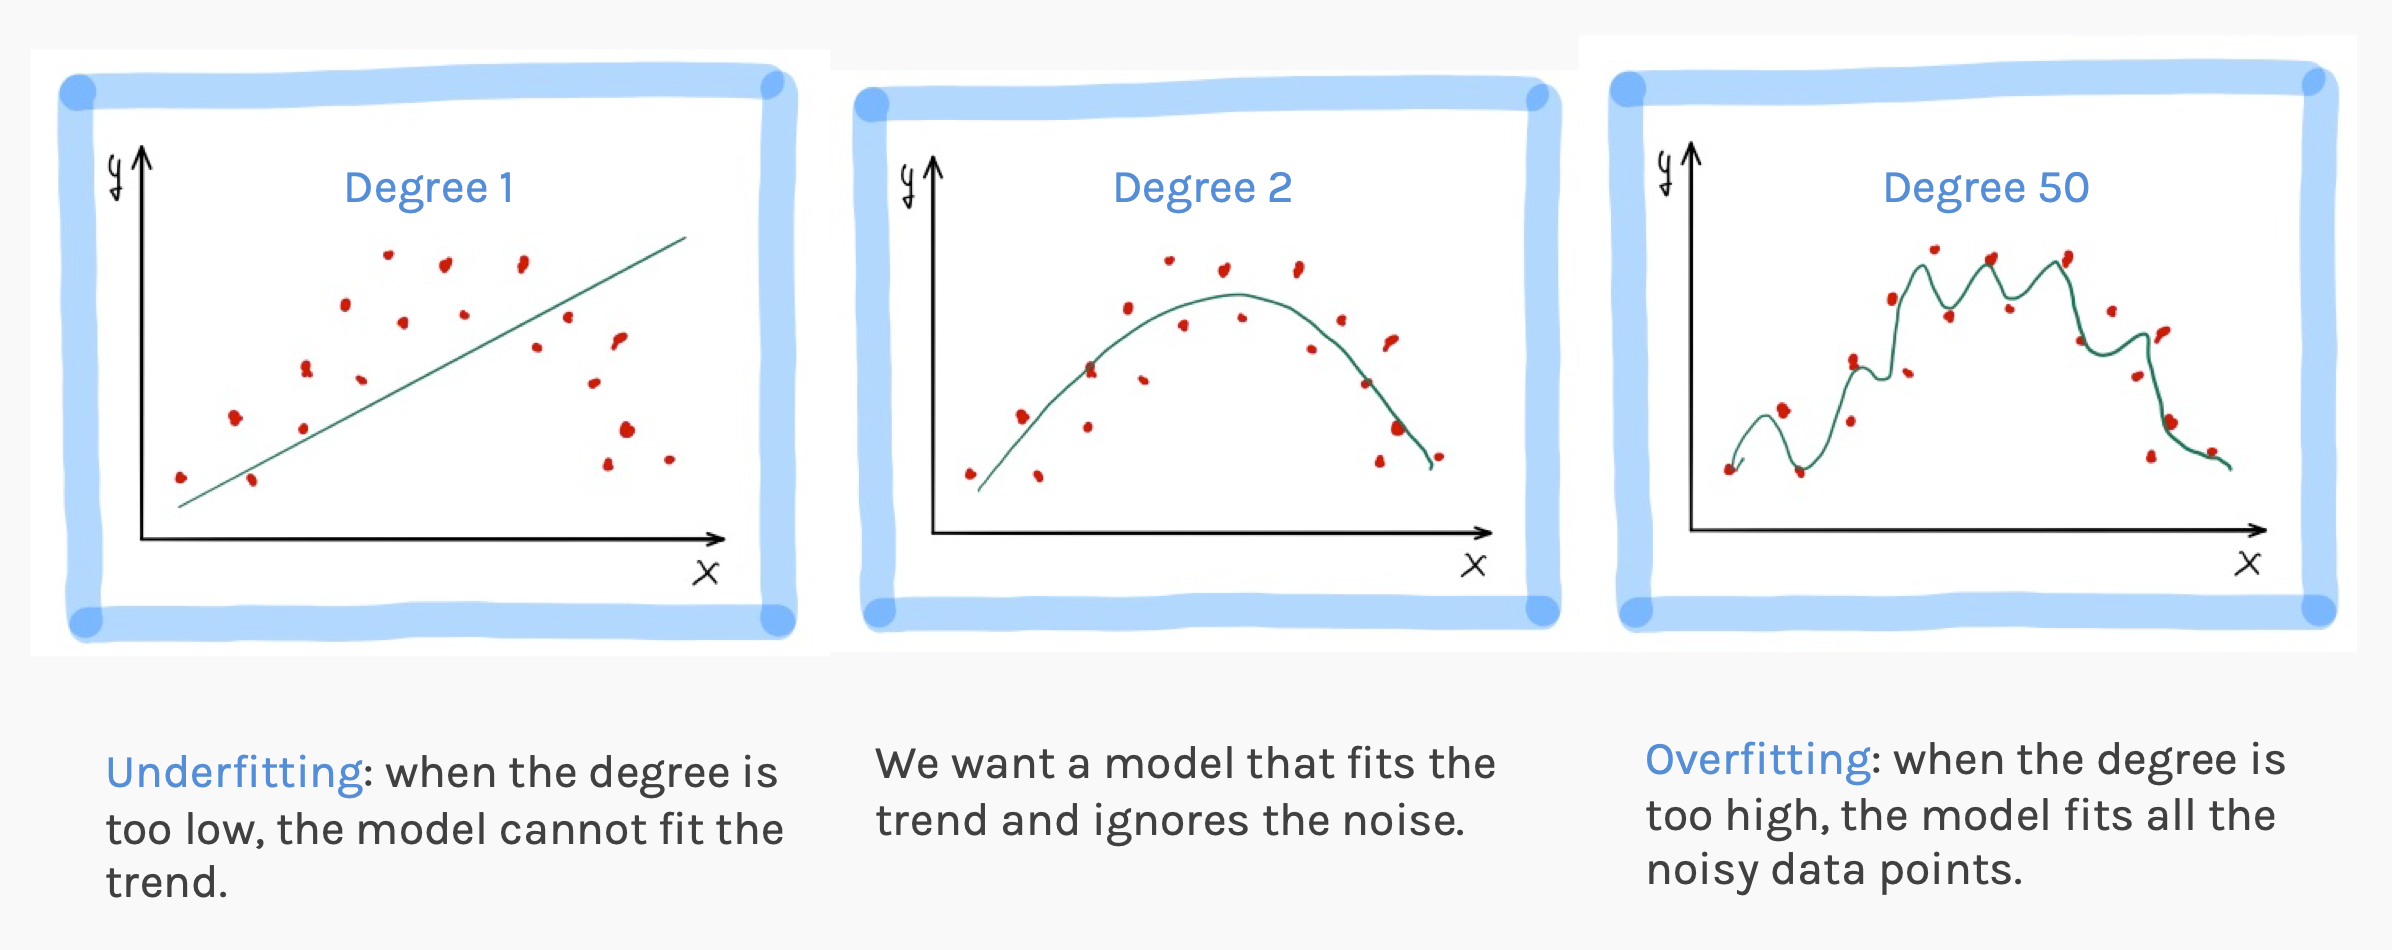

Overfitting occurs when a model corresponds too closely to the
training set, and as a result, the model fails to fit additional
data.

So far, we have seen that overfitting can happen when
- Too many parameters
- Degree of the polynomial is too large

## What is Regularization and why should I care?

When we have a lot of predictors, we need to worry about overfitting. Let's check this out:

In [48]:
def get_model(N=2):
    if N==1:
        X_train_df_N=X_train_df
        X_val_df_N=X_val_df
    else:
        X_train_df_N = add_higher_order_polynomial_terms(X_train_df,N)
        X_val_df_N = add_higher_order_polynomial_terms(X_val_df,N) 
    # Standardizing our added coefficients
    cols = X_train_df_N.columns
    scaler = StandardScaler().fit(X_train_df_N)
    X_train_df_N = pd.DataFrame(scaler.transform(X_train_df_N), 
                                columns=cols)
    X_val_df_N = pd.DataFrame(scaler.transform(X_val_df_N), 
                              columns=cols)

    model_N = OLS(np.array(y_train).reshape(-1,1),
                  sm.add_constant(X_train_df_N)).fit()
    
    #standardizedData = (X_train_df_N,X_val_df_N)
    return model_N, X_train_df_N, X_val_df_N

model,_,_= get_model(20)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     70.51
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:59:23   Log-Likelihood:                -16830.
No. Observations:                2560   AIC:                         3.394e+04
Df Residuals:                    2419   BIC:                         3.477e+04
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              542.8422      3.525    153.995      0.000     535.930     549.755
bedrooms         -1.334e+07    5.4e+06     -2.471      0.014   -2.39e+07   -2.76e+06
bathrooms           88.3591     67.150      1.316      0.188     -43.318     220.036
sqft_living       4.985e+10   6.84e+10      0.729      0.466   -8.42e+10    1.84e+11
sqft_lot            70.0537     63.827      1.098      0.273     -55.107     195.214
floors            4.116e+10   2.09e+10      1.973      0.049     2.6e+08    8.21e+10
sqft_above       -4.381e+10   6.01e+10     -0.729      0.466   -1.62e+11     7.4e+10
sqft_basement    -2.339e+10   3.21e+10     -0.729      0.466   -8.63e+10    3.95e+10
lat                309.7054     70.759      4.377      0.000     170.951     448.460
long              -312.9297     46.729     -6.697      0.000    -404.563    -221.296
bedrooms^2        1.462e+08   4.79e+07      3.049      0.002    5.22e+07     2.4e+08
bedrooms^3         6.28e+07   1.06e+08      0.591      0.555   -1.46e+08    2.71e+08
bedrooms^4       -3.648e+09   1.21e+09     -3.013      0.003   -6.02e+09   -1.27e+09
bedrooms^5        3.055e+09   2.68e+09      1.140      0.254    -2.2e+09    8.31e+09
bedrooms^6        3.347e+10    1.3e+10      2.583      0.010    8.06e+09    5.89e+10
bedrooms^7       -5.492e+10   2.68e+10     -2.049      0.041   -1.07e+11   -2.37e+09
bedrooms^8       -6.878e+10   6.56e+10     -1.049      0.294   -1.97e+11    5.98e+10
bedrooms^9        2.442e+11   1.02e+11      2.393      0.017    4.41e+10    4.44e+11
bedrooms^10       -1.84e+11   1.58e+11     -1.164      0.245   -4.94e+11    1.26e+11
bedrooms^11      -2.993e+11   2.17e+11     -1.379      0.168   -7.25e+11    1.26e+11
bedrooms^12       3.698e+11   2.23e+11      1.662      0.097   -6.66e+10    8.06e+11
bedrooms^13       2.833e+11   2.13e+11      1.329      0.184   -1.35e+11    7.01e+11
bedrooms^14       3.756e+10   8.17e+10      0.460      0.646   -1.23e+11    1.98e+11
bedrooms^15       5.119e+10   1.26e+11      0.405      0.685   -1.96e+11    2.99e+11
bedrooms^16      -4.955e+11   1.74e+11     -2.849      0.004   -8.37e+11   -1.54e+11
bedrooms^17      -3.797e+11    1.7e+11     -2.230      0.026   -7.14e+11   -4.59e+10
bedrooms^18      -1.984e+11   1.98e+11     -1.001      0.317   -5.87e+11     1.9e+11
bedrooms^19       7.176e+11   2.81e+11      2.553      0.011    1.67e+11    1.27e+12
bedrooms^20      -5.582e+10   1.06e+11     -0.527      0.598   -2.63e+11    1.52e+11
bathrooms^2      -1012.8137    416.123     -2.434      0.015   -1828.808    -196.820
bathrooms^3      -6323.3110   6365.929     -0.993      0.321   -1.88e+04    6159.927
bathrooms^4       2.131e+05   8.33e+04      2.558      0.011    4.97e+04    3.76e+05
bathrooms^5       2.012e+05    5.8e+05      0.347      0.729   -9.36e+05    1.34e+06
bathrooms^6      -2.167

In [50]:
models = []
X_trains = []
X_vals = []
x = [i+1 for i in range(17)]
#print(x)
for i in x:
    model,train_data,val_data = get_model(N=i)
    models.append(model)
    X_trains.append(train_data)
    X_vals.append(val_data)

In [54]:
from sklearn.metrics import r2_score
r2_val = []
r2_train = []
mse_train =[]
mse_val =[]

for i,model in enumerate(models):
    y_pred_tra = model.predict(sm.add_constant(X_trains[i]))
    y_pred_val = model.predict(sm.add_constant(X_vals[i]))
    r2_train.append(r2_score(y_train, y_pred_tra))
    r2_val.append(r2_score(y_val, y_pred_val))
    mse_train.append(((y_train-np.array(y_pred_tra).reshape(-1,1))**2).mean())
    mse_val.append(((y_val-np.array(y_pred_val).reshape(-1,1))**2).mean())

Note: the function r2_score($Y$,$\hat{Y}$)=$1-\frac{\|Y-\hat{Y}\|^2}{\text{Var}(Y)}.$

In [124]:
#help(r2_score)

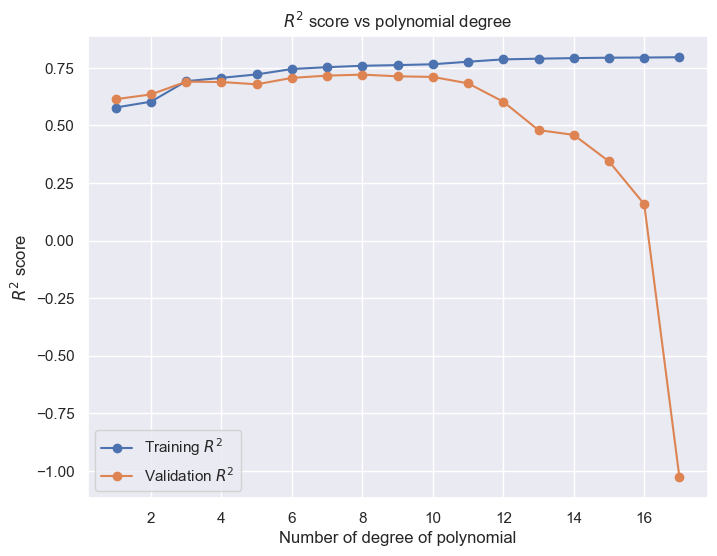

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, r2_train, 'o-', label=r'Training $R^2$')
ax.plot(x, r2_val, 'o-', label=r'Validation $R^2$')
ax.set_xlabel('Number of degree of polynomial')
ax.set_ylabel(r'$R^2$ score')
ax.set_title(r'$R^2$ score vs polynomial degree')
ax.legend();

[64494.05603722115, 60597.92405366139, 47026.867932805544, 44811.425544561374, 42541.10989813491, 38962.98367738952, 37736.53440188464, 36803.74434735412, 36373.41999390881, 35804.74295777496, 34124.146763908924, 32568.01009088578, 32108.862009954486, 31719.291958580387, 31455.910620793187, 31334.337296735106, 31156.254552850325]


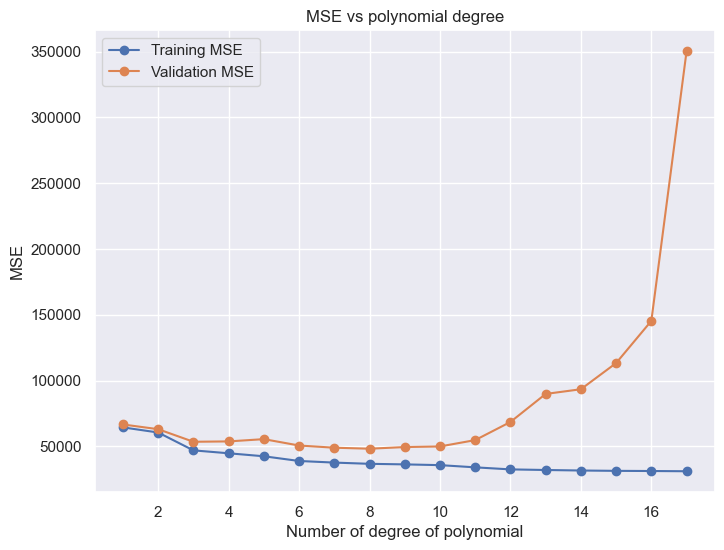

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, mse_train, 'o-', label=r'Training MSE')
ax.plot(x, mse_val, 'o-', label=r'Validation MSE')
ax.set_xlabel('Number of degree of polynomial')
ax.set_ylabel(r'MSE')
ax.set_title(r'MSE vs polynomial degree')
ax.legend();
print(mse_train)

We notice a big difference between training and validation $R^2$ scores and large MSE: seems like we are overfitting.

#### Generalization Error （泛化）
We know to evaluate the model on both train and test data,
because models that do well on training data may do poorly
on new data (overfitting).

The ability of models to do well on new data is called
generalization.

The goal of model selection is to choose the model that
generalizes the best.

## What about Multicollinearity?

There's seemingly a lot of multicollinearity in the data. Take a look at the warnings that we got when showing our summary for our polynomial models: 

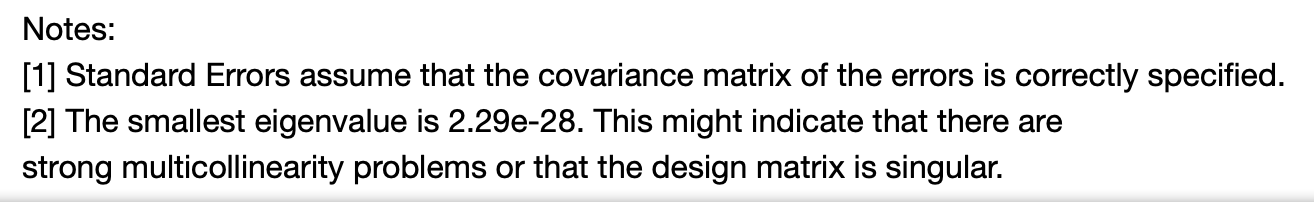

What is multicollinearity? Why do we have it in our dataset? Why is this a problem? 

Does regularization help solve the issue of multicollinearity? 

## What does Regularization/penalization help with?

We have some pretty large and extreme coefficient values in our most recent models. These coefficient values also have very high variance. We can also clearly see some overfitting to the training set. In order to reduce the coefficients of our parameters, we can introduce a penalty term that penalizes some of these extreme coefficient values. Specifically, regularization helps us: 

1. Avoid overfitting. Reduce features that have weak predictive power.
2. Discourage the use of a model that is too complex

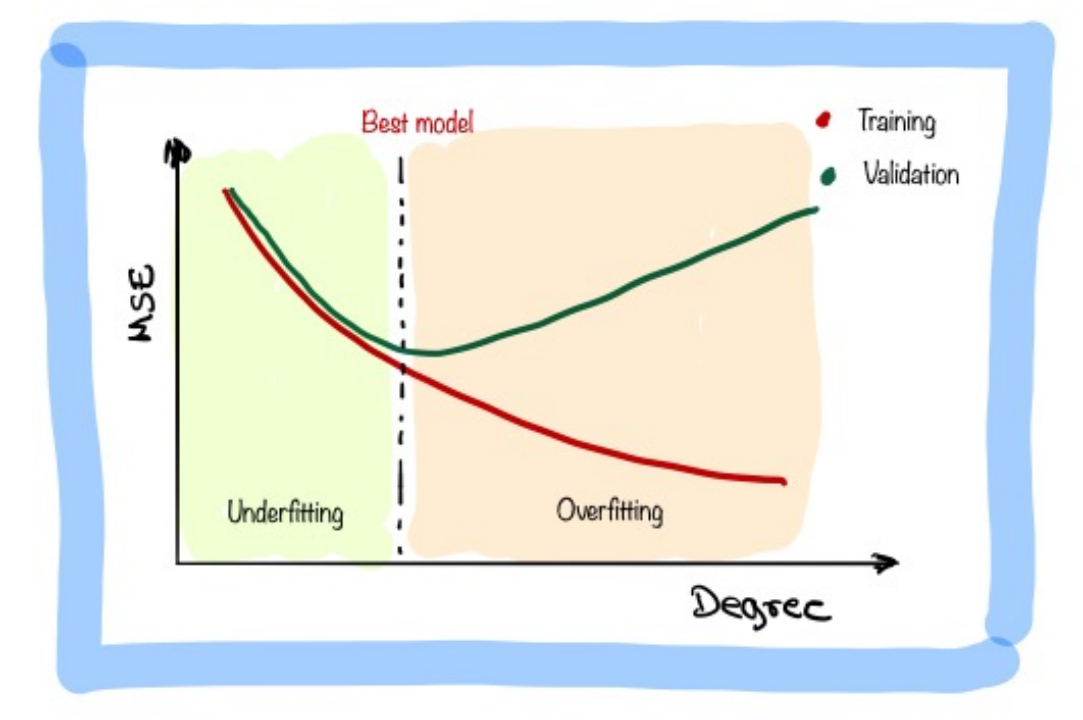

### Idea: Reduce Variance by Increasing Bias



## Ridge Regression

Ridge Regression is one such form of regularization. In practice, the ridge estimator reduces the complexity of the model by shrinking the coefficients, but it doesn’t nullify them. We control the amount of regularization using a parameter $\lambda$. **NOTE**: sklearn's [ridge regression package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) represents this $\lambda$ using a parameter alpha. In Ridge Regression, the penalty term is proportional to the L2-norm of the coefficients. 



$$L(\beta) = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \beta_i^\top X_i)^2 + \lambda\|\beta\|^2_2$$





## Lasso Regression

Lasso Regression is another form of regularization. Again, we control the amount of regularization using a parameter $\lambda$. **NOTE**: sklearn's [lasso regression package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) represents this $\lambda$ using a parameter alpha. In Lasso Regression, the penalty term is proportional to the L1-norm of the coefficients. 


$$L(\beta) = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \beta_i^\top X_i)^2 + \lambda\|\beta\|_1$$
where $\|\beta\|_1=\sum_{k}^{p}|\beta_k|.$

### Some Differences between Ridge and Lasso Regression

1. Since Lasso regression tend to produce zero estimates for a number of model parameters - we say that Lasso solutions are **sparse** - we consider to be a method for variable selection.
2. In Ridge Regression, the penalty term is proportional to the $L_2$-norm of the coefficients whereas in Lasso Regression, the penalty term is proportional to the $L_1$-norm of the coefficients.
3. Ridge Regression has a closed form solution! Lasso Regression does not. We often have to solve this iteratively. In the sklearn package for Lasso regression, there is a parameter called `max_iter` that determines how many iterations we perform. 

KKT condition https://www.stat.cmu.edu/~ryantibs/convexopt-S15/scribes/12-kkt-scribed.pdf

In [128]:
np.random.choice(range(1,67))

42

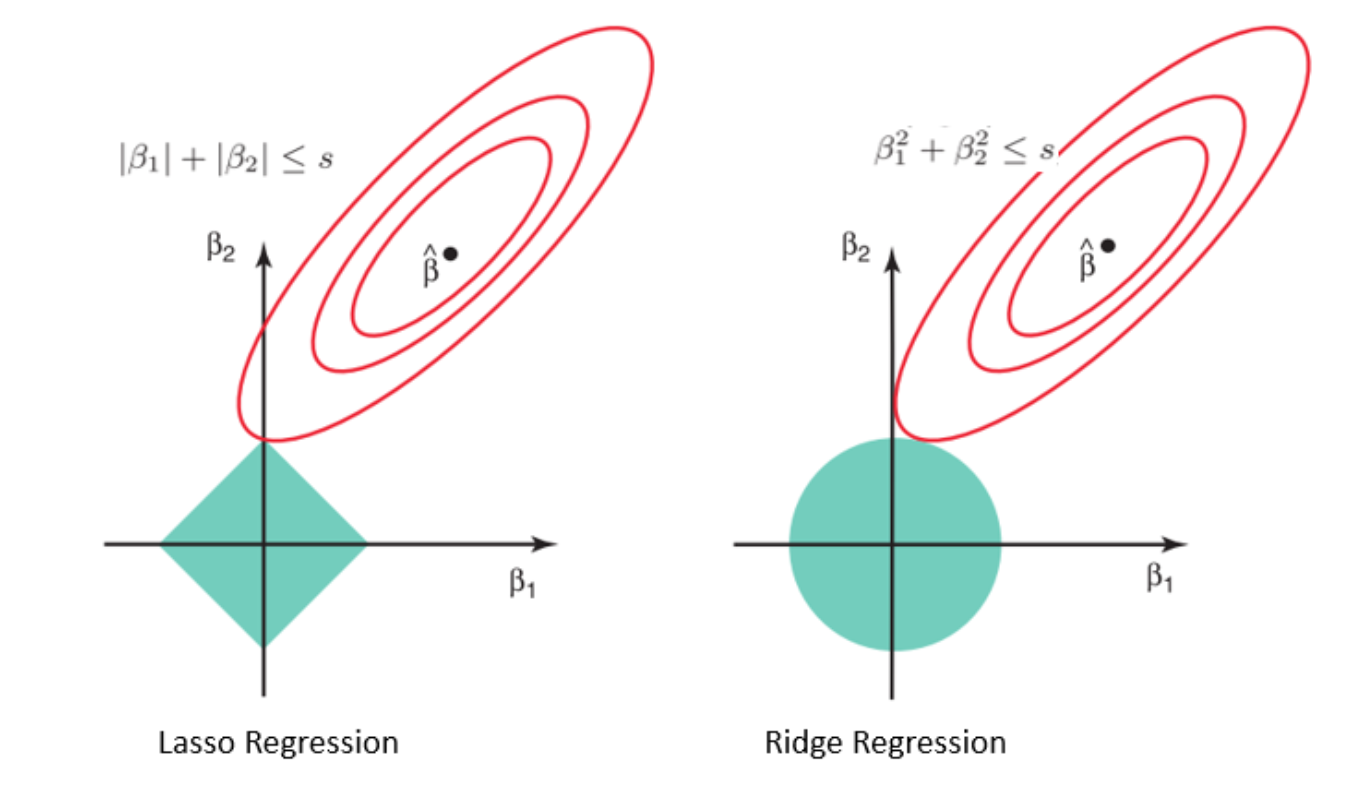

### Why Standardizing Variables was not a waste of time

Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to standardize the variables. 

## Let's use Ridge and Lasso to regularize our degree N polynomial

In [60]:
from sklearn.linear_model import Ridge

# linear regression with poly.
model_N,X_train_df_N,X_val_df_N = get_model(N=16)
y_pred_val = model_N.predict(sm.add_constant(X_val_df_N))
r2_val_score =r2_score(y_val, y_pred_val)

# ridge regression
# some values you can try out: 0.01, 0.1, 0.5, 1, 5, 10, 20, 40, 100, 200, 500, 1000, 10000
alpha = 10
ridge_model = Ridge(alpha=alpha).fit(X_train_df_N, y_train)

print('R squared score for our original OLS model: {}'.format(r2_val_score))
print('R squared score for Ridge with alpha={}: {}'.format(alpha, ridge_model.score(X_val_df_N,y_val)))



R squared score for our original OLS model: 0.15843849610922156
R squared score for Ridge with alpha=10: 0.6898750339843276


In [132]:
X_train_df_N.shape

(2560, 144)

R squared score for our original OLS model: 0.15843849610922156
R squared score for Lasso with alpha=0.01: 0.6981743792626792


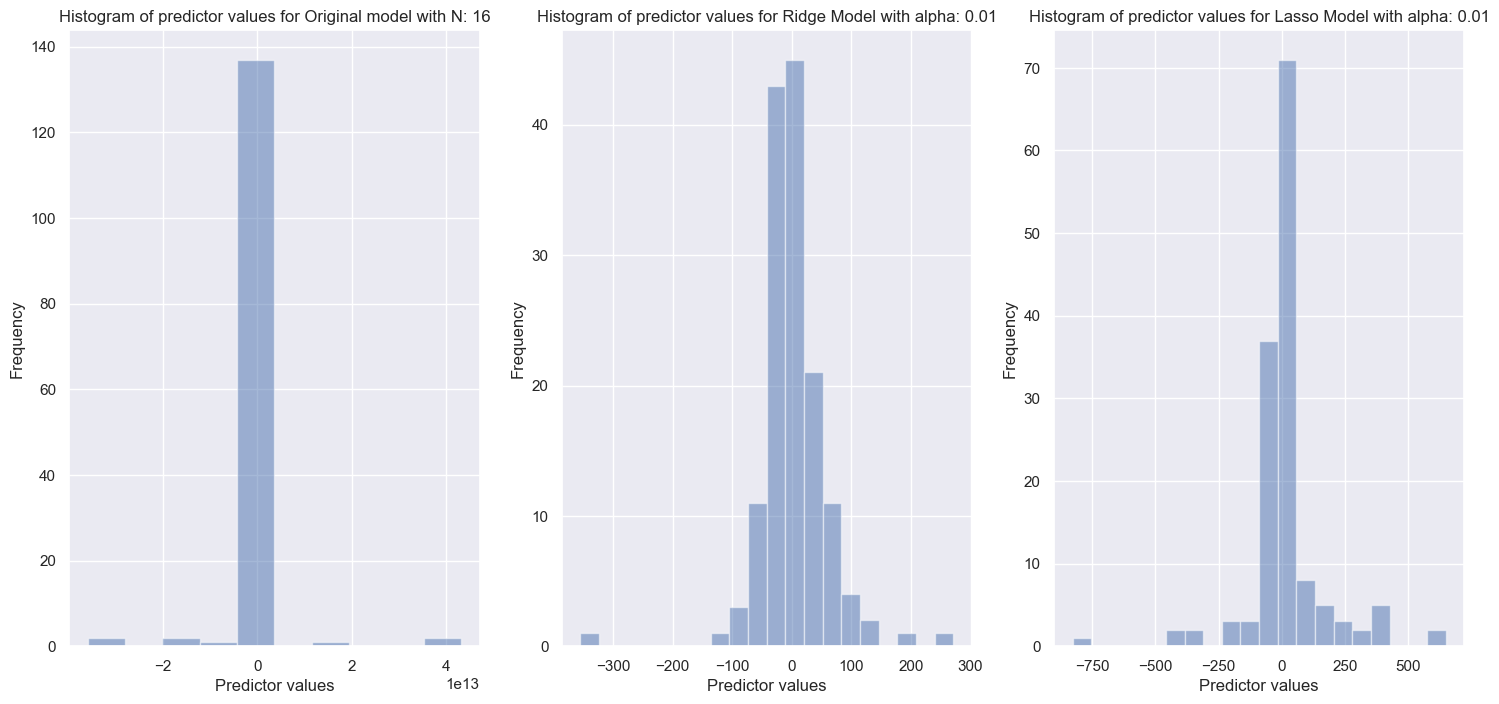

In [62]:
# Lasso regression
from sklearn.linear_model import Lasso

# some values you can try out: 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20
alpha = 0.01
lasso_model = Lasso(alpha=alpha,max_iter = 1000).fit(X_train_df_N, y_train)

print('R squared score for our original OLS model: {}'.format(r2_val_score))
print('R squared score for Lasso with alpha={}: {}'.format(alpha, lasso_model.score(X_val_df_N,y_val)))

fig, ax = plt.subplots(figsize=(18,8), ncols=3)
ax = ax.ravel()
ax[0].hist(model_N.params, bins=10, alpha=0.5)
ax[0].set_title('Histogram of predictor values for Original model with N: {}'.format(N))
ax[0].set_xlabel('Predictor values')
ax[0].set_ylabel('Frequency')

ax[1].hist(ridge_model.coef_.flatten(), bins=20, alpha=0.5)
ax[1].set_title('Histogram of predictor values for Ridge Model with alpha: {}'.format(alpha))
ax[1].set_xlabel('Predictor values')
ax[1].set_ylabel('Frequency');

ax[2].hist(lasso_model.coef_.flatten(), bins=20, alpha=0.5)
ax[2].set_title('Histogram of predictor values for Lasso Model with alpha: {}'.format(alpha))
ax[2].set_xlabel('Predictor values')
ax[2].set_ylabel('Frequency');

In [64]:
# number of zeros for linear regression
(model_N.params==0).sum()

0

In [66]:
# number of zeros for ridge regression
(ridge_model.coef_.flatten()==0).sum()

0

In [70]:
# number of zeros for LASSO regression
(lasso_model.coef_.flatten()==0).sum()  # lots of zeros.

5

## Model Selection and Cross-Validation

Refer to [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html):

#### Cross-Validation

Using a single validation set to select amongst multiple models can be
problematic - there is the possibility of overfitting to the validation
set.

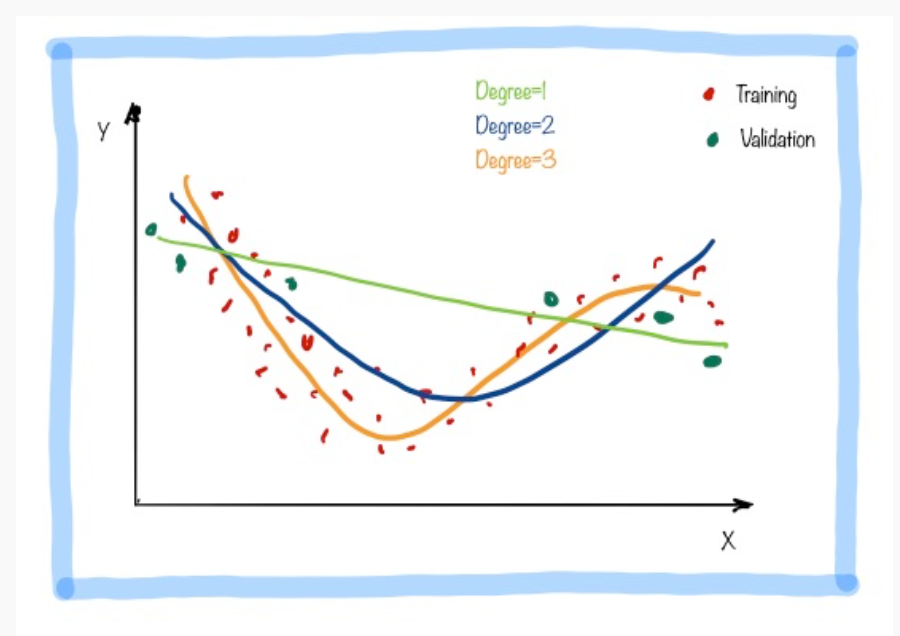
It is obvious that degree=3 is the
correct model but the validation
set by chance favors the linear
model.

One solution to the problems raised by using a single validation set is to
evaluate each model on multiple validation sets and average the
validation performance.

One can randomly split the training set into training and validation
multiple times but randomly creating these sets can create the scenario
where important features of the data never appear in our random draws.

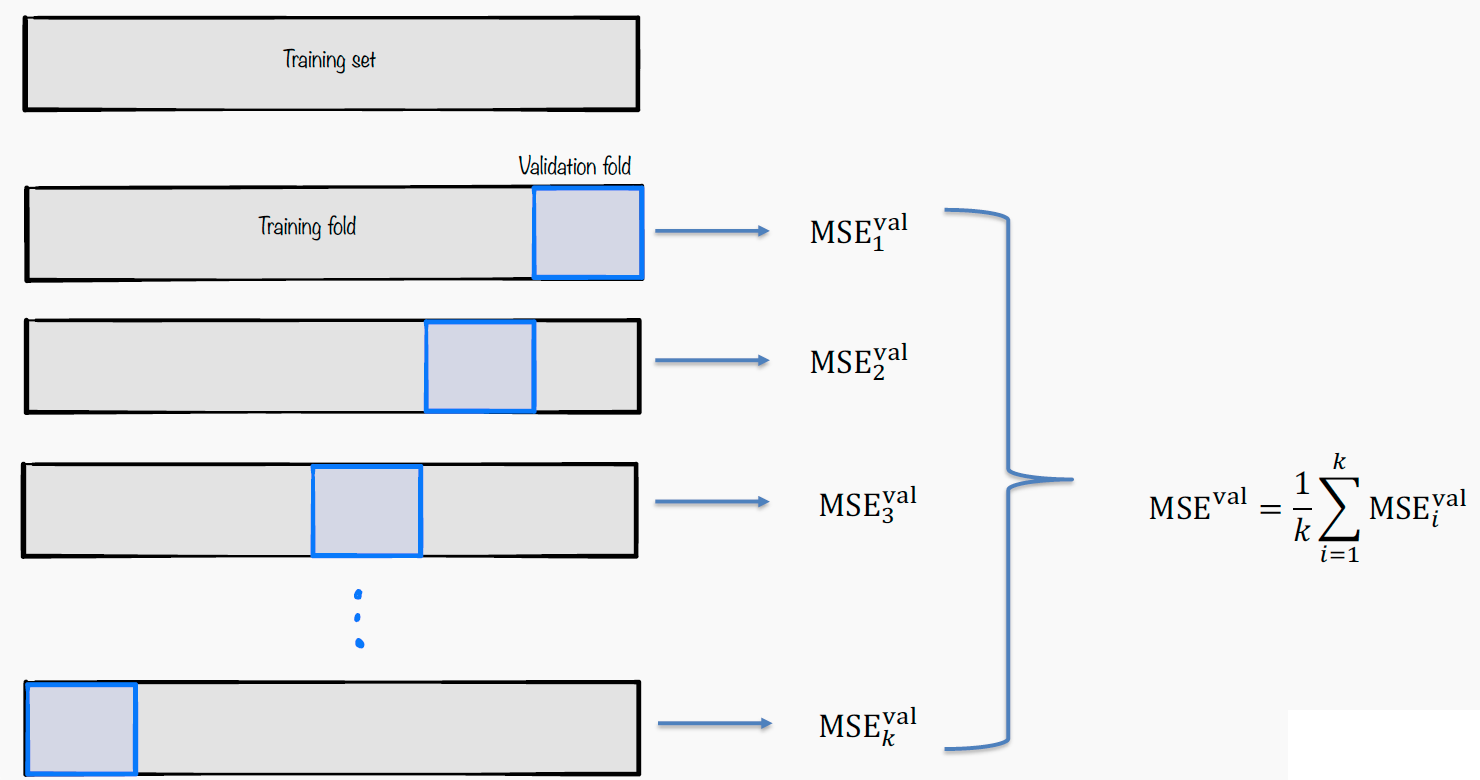

##### K-fold CV
Given a data set ${(X_1,Y_1),…,(X_n,Y_n)}$, where each ${(X_1,Y_1),…,(X_n,Y_n)}$ contains $J$ features. 
To ensure that every observation in the dataset is included in at least one training set and at least one validation set we use the K-fold validation: 
- split the data into $K$ uniformly sized chunks, ${C_1,…,C_K}$
- we create $K$ number of training/validation splits, using one of the $K$ chunks for validation and the rest for training.

We fit the model on each training set, denoted $\hat{f}_{C_{−i}}$ , and evaluate it on the corresponding validation set, $\hat{f}_{C_{−i}}(X_{i})$. The cross validation is the performance of the model averaged across all validation sets:

$$CV=\frac{1}{K}\sum_{i=1}^K\frac{1}{|C_i|} \sum_{(X_i,Y_i)\in C_i} L(\hat{f}_{C_{−i}}(X_{i}),Y_{i}), $$
where L is a loss function. 


##### Leave-One-Out
Or using the leave one out method: 
validation set: ${X_i}$  
training set: $X_{−i}={X_1,\cdots,X_i−1,X_i+1,\cdots,X_n},$ for $i=1,\cdots,n$

We fit the model on each training set, denoted $\hat{f}_{X_{−i}}$, and evaluate it on the corresponding validation set, $\hat{f}_{X_{−i}}(X_i)$. 
The cross validation score is the performance of the model averaged across all validation sets: 
$$CV=\frac{1}{n}\sum_{i=1}^n L(\hat{f}_{X_{−i}}(X_{i}),Y_{i}), $$
where L is a loss function. 

In [72]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alphas = (0.001,0.005, 0.01, 0.1, 10, 100, 1000, 10000)

# Let us do k-fold cross validation 
k = 4
fitted_ridge = RidgeCV(alphas=alphas).fit(X_train_df_N, y_train)
fitted_lasso = LassoCV(alphas=alphas).fit(X_train_df_N, y_train)

print('R^2 score for our original OLS model: {}\n'.format(r2_val[-1]))

ridge_a = fitted_ridge.alpha_
print('Best alpha for ridge: {}'.format(ridge_a))
print('R^2 score for Ridge with alpha={}: {}\n'.format(ridge_a, fitted_ridge.score(X_val_df_N,y_val)))

lasso_a = fitted_lasso.alpha_
print('Best alpha for lasso: {}'.format(lasso_a))
print('R squared score for Lasso with alpha={}: {}'.format(lasso_a, fitted_lasso.score(X_val_df_N,y_val)))

R^2 score for our original OLS model: -1.0274705557989847

Best alpha for ridge: 10000.0
R^2 score for Ridge with alpha=10000.0: 0.4292538018474644

Best alpha for lasso: 10.0
R squared score for Lasso with alpha=10.0: 0.663633358703594


We can also look at the coefficients of our CV models.

**Final Step:** report the score on the test set for the model you have chosen to be the best.

## Sklearn's <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html' > cross_validate</a> function:


Best R^2 Score: 0.5273565666204403: 
Best negtive MSE: -0.43787574510964067: 


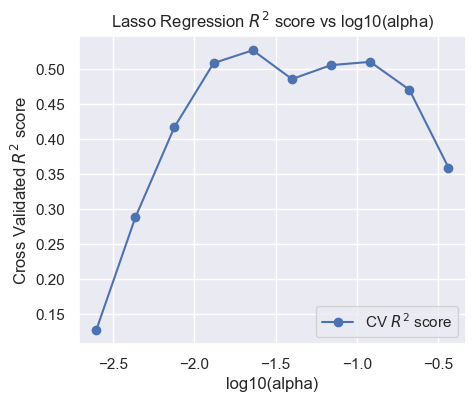

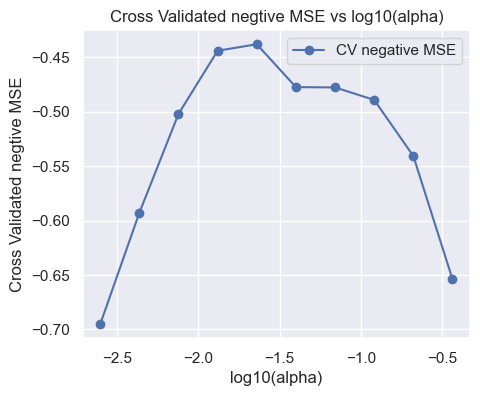

In [74]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso

#scale the design matrix
X_df = X_train_df_N
X_df = StandardScaler().fit_transform(X_df)
y_train= StandardScaler().fit_transform(y_train)

#alpha values to optimize
alphas = [np.exp(i) for i in np.linspace(-6, -1, 10)]
sklearn_models = []

#fit our various models
for i, alpha in enumerate(alphas):
    #model = Lasso(alpha=alpha, max_iter = 1000).fit(X_df, y_train)
    model = Lasso(alpha=alpha, max_iter = 1000)#.fit(X_df, y_train)
    sklearn_models.append(model)

#get the cross validation scores
for i, model in enumerate(sklearn_models):
    #if i == 0 initialize our lists
    if not i:
        r2_val = []
        neg_mse_val = []

    #y_pred_tra = model.predict(X_df)
    cv_scores = cross_validate(model, X_df, y_train, cv=5, scoring = ('r2', 'neg_mean_squared_error'))
    #print(cv_scores)
    r2_avg_score = np.mean(cv_scores["test_r2"])
    r2_val.append(r2_avg_score)
    
    neg_mse = np.mean(cv_scores["test_neg_mean_squared_error"])
    neg_mse_val.append(neg_mse)
    
#plot
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.log10(alphas), r2_val, 'o-', label=r'CV $R^2$ score')
ax.set_xlabel('log10(alpha)')
ax.set_ylabel(r'Cross Validated $R^2$ score')
ax.set_title(r'Lasso Regression $R^2$ score vs log10(alpha)')
ax.legend()
print("Best R^2 Score: {}: ".format(np.max(r2_val)))

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.log10(alphas), neg_mse_val, 'o-', label=r'CV negative MSE')
ax.set_xlabel('log10(alpha)')
ax.set_ylabel(r'Cross Validated negtive MSE')
ax.set_title(r'Cross Validated negtive MSE vs log10(alpha)')
ax.legend()

print("Best negtive MSE: {}: ".format(np.max(neg_mse_val)))
